In [1]:
import pandas as pd
import numpy as np

df =pd.read_csv('F:\\Mini Capstone\\train.csv')
df.head()

Id County Province_State Country_Region  Population    Weight        Date  \
0   1    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-23   
1   2    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-23   
2   3    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-24   
3   4    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-24   
4   5    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-25   

           Target  TargetValue  
0  ConfirmedCases          0.0  
1      Fatalities          0.0  
2  ConfirmedCases          0.0  
3      Fatalities          0.0  
4  ConfirmedCases          0.0

In [2]:
from statsmodels.tsa.stattools import adfuller

def Dicky_Fuller(x):
    result=adfuller(x)
    print(f'ADF Statistic :{result[0]}')
    print(f'p_value :{result[1]}')

In [3]:
df_con =df[df['Target']=='ConfirmedCases']
df_fal =df[df['Target']=='Fatalities']

In [4]:
import plotly.express as px
fig = px.pie(df[df['Country_Region']=='India'], values='TargetValue', names='Target',title='Confirmed cases & Fatalities in India' )
fig.show()

In [5]:
df_ind_con = df_con[df_con['Country_Region']=='India']
df_ind_fal = df_fal[df_fal['Country_Region']=='India']

In [6]:
df_ind_con['TargetValue'].sum()

124794.0

In [7]:
df_ind_con['Date'] = pd.to_datetime(df_ind_con['Date'])
df_ind_con.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Id                         int64
County                    object
Province_State            object
Country_Region            object
Population                 int64
Weight                   float64
Date              datetime64[ns]
Target                    object
TargetValue              float64
dtype: object

In [8]:
df_ind_con.describe()

Id    Population        Weight  TargetValue
count    121.000000  1.210000e+02  1.210000e+02   121.000000
mean   40441.000000  1.295210e+09  4.766004e-02  1031.355372
std       70.147464  0.000000e+00  6.270971e-17  1617.896386
min    40321.000000  1.295210e+09  4.766004e-02     0.000000
25%    40381.000000  1.295210e+09  4.766004e-02     0.000000
50%    40441.000000  1.295210e+09  4.766004e-02    50.000000
75%    40501.000000  1.295210e+09  4.766004e-02  1541.000000
max    40561.000000  1.295210e+09  4.766004e-02  6568.000000

In [10]:
def Moving_avg(x):
    for i in range(2,121):
        sum = x.iloc[i-1,-1] + x.iloc[i-2,-1] + x.iloc[i,-1]
        x.iloc[i,-1] = sum/3

In [11]:
Moving_avg(df_ind_con)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
df_ind_con.describe()

Id    Population        Weight  TargetValue
count    121.000000  1.210000e+02  1.210000e+02   121.000000
mean   40441.000000  1.295210e+09  4.766004e-02   894.429426
std       70.147464  0.000000e+00  6.270971e-17  1408.593265
min    40321.000000  1.295210e+09  4.766004e-02     0.000000
25%    40381.000000  1.295210e+09  4.766004e-02     0.118850
50%    40441.000000  1.295210e+09  4.766004e-02    49.418351
75%    40501.000000  1.295210e+09  4.766004e-02  1312.966441
max    40561.000000  1.295210e+09  4.766004e-02  5612.286693

In [202]:
df_ind_con_1 = df_ind_con[['Date','TargetValue']]
df_ind_con_1 = df_ind_con_1.set_index('Date')
df_ind_con_1.head()

TargetValue
Date                   
2020-01-23          0.0
2020-01-24          0.0
2020-01-25          0.0
2020-01-26          0.0
2020-01-27          0.0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



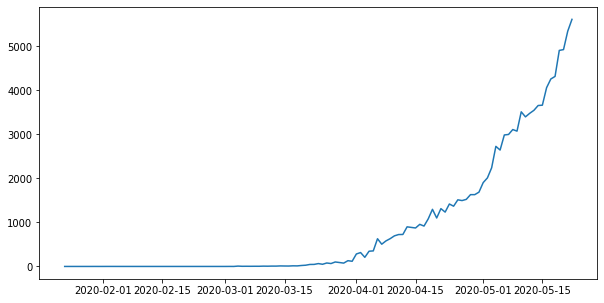

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
plt.plot(df_ind_con_1['TargetValue'])

Checking the if the variable is stationary

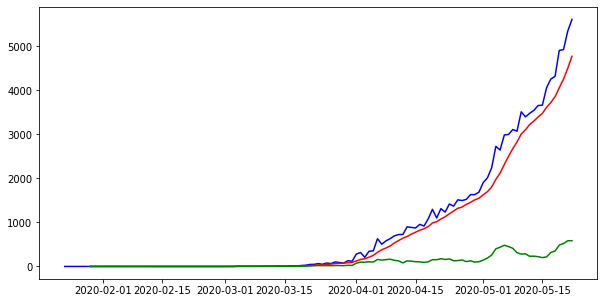

In [15]:
rcParams['figure.figsize'] = 10, 5
rolmean = df_ind_con_1.rolling(window=7).mean()
rolstd = df_ind_con_1.rolling(window=7).std()
ori =plt.plot(df_ind_con_1, color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [16]:
Dicky_Fuller(df_ind_con_1['TargetValue'])

ADF Statistic :3.08349711920955
p_value :1.0


FIRST DIFFERENCE

In [203]:
df_ind_con_1['Cases First Difference'] = df_ind_con_1['TargetValue'] - df_ind_con_1['TargetValue'].shift(1)
df_ind_con_1.head()

TargetValue  Cases First Difference
Date                                           
2020-01-23          0.0                     NaN
2020-01-24          0.0                     0.0
2020-01-25          0.0                     0.0
2020-01-26          0.0                     0.0
2020-01-27          0.0                     0.0

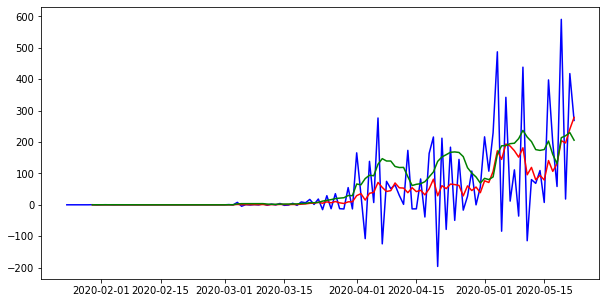

In [18]:
rolmean = df_ind_con_1['Cases First Difference'].rolling(window=7).mean()
rolstd = df_ind_con_1['Cases First Difference'].rolling(window=7).std()
ori =plt.plot(df_ind_con_1['Cases First Difference'], color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [19]:
Dicky_Fuller(df_ind_con_1['Cases First Difference'].dropna())

ADF Statistic :1.3840496179044353
p_value :0.9970404634721461


SECOND DIFFERENCE

In [204]:
df_ind_con_1['Cases Second Difference'] = df_ind_con_1['Cases First Difference'] - df_ind_con_1['Cases First Difference'].shift(1)
df_ind_con_1.head()

TargetValue  Cases First Difference  Cases Second Difference
Date                                                                    
2020-01-23          0.0                     NaN                      NaN
2020-01-24          0.0                     0.0                      NaN
2020-01-25          0.0                     0.0                      0.0
2020-01-26          0.0                     0.0                      0.0
2020-01-27          0.0                     0.0                      0.0

In [21]:
df_ind_con_1.tail()

TargetValue  Cases First Difference  Cases Second Difference
Date                                                                    
2020-05-18  4316.178235               58.344569              -138.788060
2020-05-19  4907.003967              590.825732               532.481164
2020-05-20  4925.394067               18.390100              -572.435632
2020-05-21  5343.466011              418.071944               399.681844
2020-05-22  5612.286693              268.820681              -149.251263

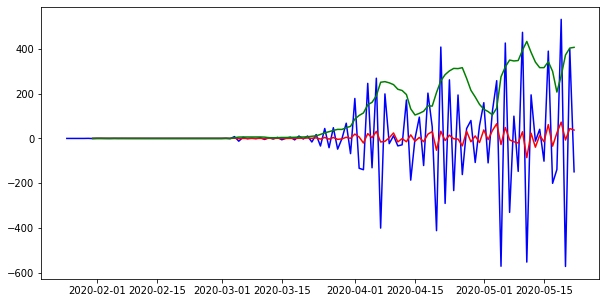

In [22]:
rolmean = df_ind_con_1['Cases Second Difference'].rolling(window=7).mean()
rolstd = df_ind_con_1['Cases Second Difference'].rolling(window=7).std()
ori =plt.plot(df_ind_con_1['Cases Second Difference'], color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [23]:
Dicky_Fuller(df_ind_con_1['Cases Second Difference'].dropna())

ADF Statistic :-5.85568811548184
p_value :3.5045961003580476e-07


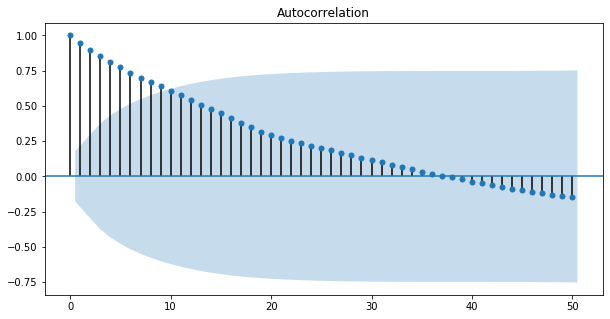

In [228]:
acf =plot_acf(df_ind_con_1['TargetValue'].dropna(),lags=50)

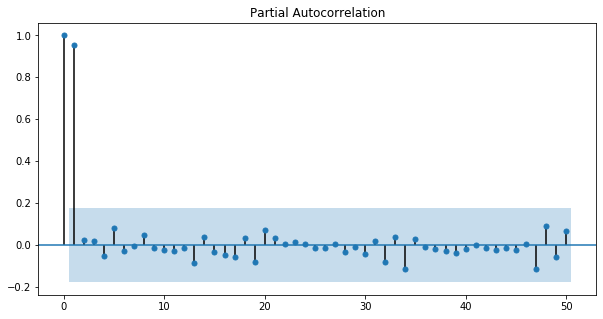

In [229]:
pacf =plot_pacf(df_ind_con_1['TargetValue'], lags=50)

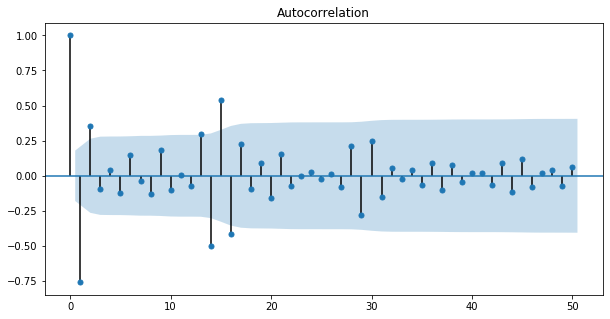

In [205]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf =plot_acf(df_ind_con_1['Cases Second Difference'].dropna(),lags=50)

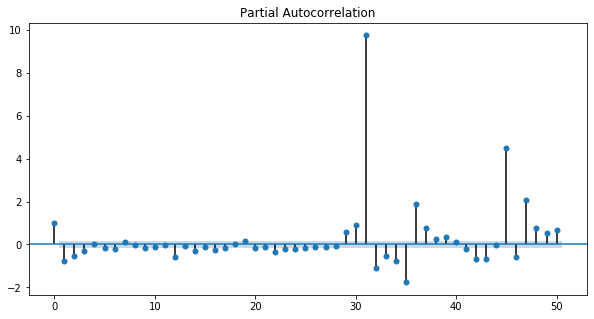

In [208]:
pacf =plot_pacf(df_ind_con_1['Cases Second Difference'].dropna(), lags=50)

AR Model

In [209]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
from datetime import timedelta

train_end = pd.datetime(2020,4,30)

train_data = df_ind_con_1[:train_end]
test_data =df_ind_con_1[train_end+timedelta(days=1):]



In [210]:
train_data.tail()

TargetValue  Cases First Difference  Cases Second Difference
Date                                                                    
2020-04-26  1496.280121              -16.975089              -161.645144
2020-04-27  1523.511777               27.231656                44.206744
2020-04-28  1630.930633              107.418856                80.187200
2020-04-29  1630.814137               -0.116496              -107.535352
2020-04-30  1687.581590               56.767453                56.883949

In [211]:
test_data.head()

TargetValue  Cases First Difference  Cases Second Difference
Date                                                                    
2020-05-01  1904.131909              216.550319               159.782866
2020-05-02  2011.237833              107.105924              -109.444395
2020-05-03  2240.456581              229.218748               122.112824
2020-05-04  2727.898138              487.441557               258.222810
2020-05-05  2643.784906              -84.113232              -571.554789

In [241]:
ARIMA_model = ARIMA(train_data['TargetValue'],order=(1,2,0))
ARIMA_model_fit=ARIMA_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [242]:
ARIMA_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.TargetValue   No. Observations:                   97
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -551.538
Method:                       css-mle   S.D. of innovations             70.986
Date:                Mon, 20 Jul 2020   AIC                           1109.075
Time:                        20:35:41   BIC                           1116.799
Sample:                    01-25-2020   HQIC                          1112.198
                         - 04-30-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3341      4.103      0.081      0.935      -7.708       8.376
ar.L1.D2.TargetValue    -0.7645      0.064    -12.036      0.000      -0.889      -0.640
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3080           +0.0000j            1.3080            0.5000
-----------------------------------------------------------------------------
"""

In [243]:
ARIMA_model_fit.params

const                   0.334105
ar.L1.D2.TargetValue   -0.764542
dtype: float64

In [244]:
pred99 = ARIMA_model_fit.(steps=22, alpha=0.1)

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

In [254]:
predictions = pd.DataFrame(ARIMA_model_fit.forecast(steps=22))

In [255]:
predictions=predictions.T

In [256]:
predictions.rename(columns={0:'TargetValue'}, inplace=True)
predictions.head()

TargetValue        1                                         2
0     1701.45  70.9864  [1562.3175799482492, 1840.5792874279782]
1      1748.7   112.83   [1527.562332002323, 1969.8459183398707]
2     1771.02  184.444  [1409.5176816259536, 2132.5267034366525]
3        1813  252.466  [1318.1717159173322, 2307.8195963530607]
4     1840.53  336.937    [1180.147494209541, 2500.915089809952]

In [259]:
predictions.index=test_data.index

In [260]:
residuals = test_data['TargetValue'] - predictions['TargetValue']

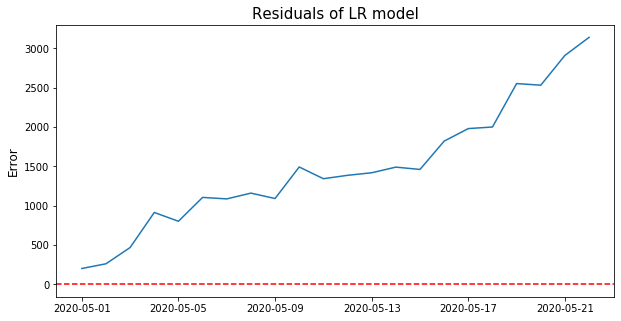

In [261]:
plt.plot(residuals)
plt.title('Residuals of LR model', fontsize=15)
plt.ylabel('Error', fontsize=12)
plt.axhline(0, color='r', linestyle='--')

Text(0, 0.5, 'Confirmed Cases')

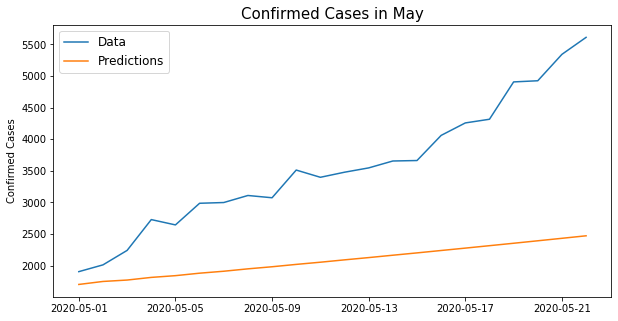

In [262]:
plt.plot(test_data['TargetValue'])
plt.plot(predictions['TargetValue'])

plt.legend(('Data', 'Predictions'), fontsize=12)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmoAAAFBCAYAAADHUYMXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd3xW9fn/8deVhCSQBAIk7CCyRFAQDai49951D3Db1mrVVkX7rWi1ra1W66+tigORuqgVi7gn1dYKYYjIEhBImGEEApHM6/fHOcEQQ7iB3Lkz3s/H437c9/mczznnOneAXHzG+Zi7IyIiIiINT1ysAxARERGRmilRExEREWmglKiJiIiINFBK1EREREQaKCVqIiIiIg2UEjURERGRBkqJmkgTYmbnmtlHZlZgZsVmtsDM7jezjChd7zAzm25mW83Mw7IlZvZQNK63p8ws1czczEZEULejmT1qZovC73KDmb1tZifVQ6h7zMyeM7OcOjrXkvB7u7uGfUeE+9zMetTF9UTkewmxDkBE6oaZPQz8HBgDPAJsAvoDNwADgHOicNkngTXASUBxWHYOsC4K16o3ZrYP8DGwBXgImAO0Bk4FJprZUHf/MoYhRuI3QMs6PN9m4GLggWrlF4X7UuvwWiISMj3wVqTxM7MzgInA1e7+bLV98cCJ7v52FK5bBtzq7o/twjHxQLy7l9R1PBFcOxUoBK509+dqqZcDJAPD3H1TtX0DgQJ3XxbNWBsSM1sCfA5cCAx099lheTywAvgAuATY292XxChMkSZJXZ8iTcMtwPTqSRqAu5dXTdLMLMPMxprZOjMrMrNPzCy76jGV3ZdmdouZ5YXdfi+bWXq4/+iwqzMe+HPY7fVc1WOrnOs5M8sxs7PN7GtgK3CwmY0IjzswjKHIzGaG2ylmNsbMNprZYjO7uPp9mdlZ4Xm3mtkqM/uDmbWoVue8sPv3OzP7N9BvZ1+kmR0JHASMrJ6khd/nrMokzcwONbOJZrbCzLaE8V9a7XzpZvZ0WGermS0zs6eq1dnPzN40s8Lw9Q8z61Rlf4vw57Es7IZdYWYTzCyxlvvYruuzyve9v5m9H8Y7z8zO3dl3EloOfEbQglbpWIKWtIk1XP82M5sa/gxXm9kbZta7yv6fhveaWu24Y8I4B0YYl0iTpkRNpJELk5NhwDsRHvI6QVflLwhaSOKAj6v+Eg1dABwHXAfcAZwO/DbcNx04NPz8cPj5N7VcswfwB+B3BN2H31bZNxZ4CTgPMOBV4BmClpofAV8Az5tZt8oDzOwC4DVgCnAmcG8Y5++q1DkQeAX4EjiXIJkYX0uMlY4CyglaiXZmL+A/wDXAGcA/gTHVEss/AYcTJNMnAXcB27oywu/9PwQteJcDIwi6qt8wMwurjQQuBf4POIGgi3sjQaK8q14k+C7OAb4BXq763e7ES2yfqF0MvEHQRVxdN+AvwFnAtWGs/zGzNuH+FwiG3/yo2nEjCP7TMSvCmESaNnfXSy+9GvEL6ETwi//6COqeHNY9qkpZCpAPPFmlbAmwCEioUvYosKra+Ry4sVrZEuChKtvPhfUOqFZvRFg+vErZqWHZs1XK2gClwI/DbQOWAmOqne8q4Dugfbg9nmBsmVWpc3d4/hG1fEdPACt34+dgBInHk8BHVcpnAz+r5bhxwHwgsUpZH4Jk8bRwexLw8C7G8xyQU8P3fVWVsvZAGXDDTs61hGCsXmb4sxgCJAIbgLMJkngHeuzg+HiC8XKFwBVVyv8OTK6ynUow3u3GXblXvfRqyi+1qIk0HZEMOB0K5Lv75G0HuW8hSAQOr1b3Y3cvq7I9B+hQW3dbLZa7+8wd7PuwyueF4ftHVeLbSJBIdg2L+gLdgfFmllD5Co9JBvYL6w0FJrp71e/ltQjjjWjwrpm1NbPHzGwpQQJTStCy17dKtZnAL83sJ2bWt4bTHA9MACqq3Mu3BMlRdpVzjDCz281sYJWWtt3xXuUHd19HMBkkohY1d88n+J4vIkj6Dahx7KOZHRJ2sa4jSAaLCBKxqt/BM8ARZtYz3L6AINl9cVduSKQpU6Im0vitI5hx2T2Cup2B1TWUrwbaVSsrqLZdQvCLeXcStZquWdN1SmooqyxPDj9XPmrkLb5Pjkr5vjs1K3zvRJCEVFV9uybLgUwzS95pzaDV6kLgj8CJBC1Nz1aJFeBGgu7mXwPzzewbM6vafZhB0LVcWu3Vs8q93A/8FfgJQVdurpndHEF8Nantu43EywQJ1SXA6+5eXL2CmXUnSAgNuB44jOC7WVPtWp8Aiwla+wCuBP7l7ut3IR6RJk2P5xBp5Ny91Mz+QzD+6Vc7qb4S6FBDeUcgmr8c63J6eWWc1wEzathfmbCt4of3WtO9V/cJcB/B+Lw3d1QpTOROI+ime6JK+Xb/AXb3AuAm4KZwgPztwAtmNsvd54T3MwF4uobLrA3PsZUg0fu1mfUheOTKo2Y2390jHZtYV14j6B4+n+D+a3Iy0Ao4K2yxJWwp3O4/A+7uZvYscJ2ZjSNo1T0lWoGLNEZqURNpGh4Fss1sePUdZhZnZieHm18QdF8eWWV/K4JfuJ/VS6R7bj5Bq1cPd8+p4VX5DLepwJnVugl3OsPR3T8FpgG/NbO06vvDWZNZQBLB2KviKvvSCCY37Ojcs4BfEvzbWzkD9UOC7tppNdzLkhrO8Q3BRJBigufk1auwK/pBgokTO5pw0RKoIOjyrFTZrVndcwRdr88S/Fzfr6tYRZoCtaiJNAHu/oaZ/Ql4xswOA/5FMCi7H0HryxLgHXd/N2x9e8XM7iToNv0FwS/WP8Yk+F3k7hVmdhswzsxaE4yRKiHoKjwb+JG7FxEkE18QjGV7hiAZujrCy1xK8MDbHDN7hO8feHsSwQzGg90918ymErRybSJITO4kmI3ZuvJEZvYZQYvZbIKWxWsJZklOCauMCj+/GbYurSUYj3cC8Jy7f2JmEwiSxxkEEyZ+RPDv978j/d7qkrv/eidVPiJIYseE3/0Agj9n1btdcfcVZvYOwX8Wfufu5XUdr0hjpkRNpIlw99vM7L8EY6JeJEi+lhA8iqHqkk7nEDxS41GC8UJTgGPdfSGNhLu/EiZHdxHM9iwnGOs0iXCcm7vnhGPBfkcwRiyHYDzZlBpPuv3554eP9xhJ0FXZlWAw/BTgEv9+VYJLgNHA8wRJ718IuvxurHK6zwnGYPUI45wBnOLueeG1FpjZIQTj0EYT/NyWE7S0Vf5M/hvGXtkaNwc4z93rZImouubuX5nZlcA9BH/eviToKn1lB4e8TpCojamfCEUaD61MICIiMWVm44HO7n5ErGMRaWjUoiYiIjFhZvsTPILkXLZ/kK6IhNSiJiIiMWHBGqIZBA84vinG4Yg0SErURERERBooPZ5DREREpIFSoiYiIiLSQDXJyQQZGRneo0ePWIchIiIislPTpk1b6+6ZNe1rkolajx49yMlpkI8XEhEREdmOmS3d0T51fYqIiIg0UErURERERBooJWoiIiIiDZQSNREREZEGqklOJtiRiooK1q5dS0FBAeXl5bEORyKQnJxMt27daNGiRaxDERERqXfNKlHLy8vDzOjRowctWrTAzGIdktTC3Vm3bh15eXnsvffesQ5HRESk3jWrrs8tW7bQtWtXEhMTlaQ1AmZG+/bt2bp1a6xDERERiYlmlagBxMU1u1tu1JRQi4hIc6asRURERKSBUqImIiIiUoM5Kzbx5qyVMY1BiVoD0qNHD1q2bElaWhrp6ekMGzaMJ554goqKip0eu2TJEsyMsrKyeohURESk6aqocJ7692LO/ut/+MO78ygt3/nv4WhpVrM+G4M33niD448/no0bNzJ58mRuvvlmvvjiC8aMGRPr0ERERJq8FQXfcdv4L/l88TpO7N+R3583kBbxsWvXUotaA9WmTRvOPPNMXnnlFcaOHcvs2bN58803GTx4MK1btyYrK4tRo0Ztq3/kkUcCkJ6eTmpqKp9//jmLFi3i2GOPpX379mRkZHDppZdSUFAQozsSERFp2N74cgUnP/pvvswr4A/nDeTJyw+iXUpiTGNSotbADR06lG7duvHpp5+SkpLC888/T0FBAW+++SaPP/44r7/+OgD//ve/ASgoKGDz5s0ceuihuDsjR45kxYoVzJ07l9zc3O2SOxEREYFNW0u55ZWZ/OylGfTqkMrbNx/BBUOyGsSTB6La9WlmS4BCoBwoc/dsMxsFXAvkh9Xucve3wvojgavD+je5+7th+cnAn4F44Gl3/31dxHfvG18zZ8WmujjVDvXv0pp7zhiwR+fo0qUL69ev5+ijj95WNnDgQC6++GImT57M2WefXeNxvXv3pnfv3gBkZmZy6623cu+99+5RLCIiIk3JF4vXcev4L1m1aSu3HN+Xnx7Ti4QYdnVWVx9j1I5x97XVyh5x94eqFphZf+AiYADQBfjAzPqGu/8KnADkAVPNbKK7z4ly3A3G8uXLadeuHV988QV33nkns2fPpqSkhOLiYs4///wdHrdmzRpuuukmPv30UwoLC6moqKBt27b1GLmIiEjDVFJWwSMfLOCJyYvYq10rXr3hUAZ3b3i/IxvSZIKzgJfdvRj41swWAkPDfQvdfTGAmb0c1t3jRG1PW7rqw9SpU1m+fDmHH344Z599NjfeeCNvv/02ycnJ/PznP2ft2iAHrql5duTIkZgZs2bNon379rz++uvceOON9X0LIiIiDcrCNYXc/PJMvl6xiYuHZvGr0/qTktSQUqLvRbttz4H3zGyamV1XpfxGM5tlZs+aWWX62hXIrVInLyzbUfl2zOw6M8sxs5z8/PzquxudTZs2MWnSJC666CIuu+wy9t9/fwoLC2nXrh3JyclMmTKFF198cVv9zMxM4uLiWLx48baywsJCUlNTSU9PZ/ny5fzxj3+Mxa2IiIg0CO7O858v4bTHPmPlxq2MvvwgfnfuwAabpEH0E7XD3P1A4BTgp2Z2JPA40As4AFgJPBzWrWnEntdSvn2B+2h3z3b37MzMzDoJPhbOOOMM0tLSyMrK4oEHHuDWW2/d9miOv/3tb/z6178mLS2N++67jwsuuGDbca1ateLuu+/msMMOIz09nf/973/cc889TJ8+nTZt2nDaaadx7rnnxuq2REREYmpN4VZGjJnKr//1NYf2as87Pz+CEwd0inVYO2XuP8h5onOhYBLB5qpj08ysBzDJ3fcLJxLg7r8L970LjAqrjnL3k8Ly7erVJDs723Nycn5QPnfuXPbdd986uBupT/q5iYjInnj361WMfO0rthSX8avT9uWyQ/ZqEDM6K5nZNHfPrmlf1FrUzCzFzNIqPwMnArPNrHOVaucAs8PPE4GLzCzJzPYG+gBTgKlAHzPb28wSCSYcTIxW3CIiItI0bCku485/zuL6cdPokp7MmzcdzuWH9mhQSdrORLNTtiMwIfwyEoAX3f0dMxtnZgcQdF8uAa4HcPevzWw8wSSBMuCn7l4OYGY3Au8SPJ7jWXf/Oopxi4iISCM3fdkGbnllJsvWF/Hjo3txy/F9SUxoOI/diFTUErVwluagGsovr+WYB4AHaih/C3irTgMUERGRJqesvIK/fLyQ//fRQjq1Tublaw/h4J7tYx3Wbmu40xxEREREdsGStVv4+SszmZlbwDmDu3LvWQNondwi1mHtESVqIiIi0qi5O+Nzcrn3jTkkxBmPXTyYMwd1iXVYdUKJmoiIiDRa67eUcOc/Z/HenNUM69Weh84fRJf0lrEOq84oURMREZFG6bNv1nLL+JlsLCrlV6fty1WH7U1cXOOZ0RkJJWoiIiLS6Hz2zVqufG4Ke2ekMPbKofTv0jrWIUVF45unKrtsyZIlmBllZWUAnHLKKYwdO3aXz7Ns2TJSU1MpLy+v6xBFREQiNiuvgOvH5dArM5V/XD+sySZpoEStQenRowctW7YkNTWVjh07cuWVV7J58+Y6v87bb7/N8OHDI4rngw8+2LbdvXt3Nm/eTHx8fJ3HJCIiEonF+ZsZMWYqbVMSGXvVUNq0atyzOndGiVoD88Ybb7B582amT5/O1KlTuf/++7fb7+5UVFTEKDoREZHYWbVxK5c/MwUDxl19MB1bJ8c6pKhTotZAde3alVNOOYXZs2dz9NFHb1twvVWrVixevJiNGzdy9dVX07lzZ7p27cqvfvWrbV2S5eXl/OIXvyAjI4OePXvy5ptvbnfuo48+mqeffnrb9lNPPcW+++5LWloa/fv3Z/r06Vx++eUsW7aMM844g9TUVP7whz/8oAt1xYoVnHnmmbRr147evXvz1FNPbTvnqFGjuOCCC7jiiitIS0tjwIABVF1/9cEHH6Rr166kpaWxzz778OGHH0bz6xQRkUauoKiEK579go3flTL2qqHsnZES65DqhRK1Bio3N5e33nqLwYMHAzBu3DhGjx5NYWEhe+21F8OHDychIYGFCxcyY8YM3nvvvW3J11NPPcWkSZOYMWMGOTk5vPrqqzu8zj/+8Q9GjRrF888/z6ZNm5g4cSLt27dn3LhxdO/efVsL3+233/6DYy+++GK6devGihUrePXVV7nrrru2S7gmTpzIRRddREFBAWeeeSY33ngjAPPnz+cvf/kLU6dOpbCwkHfffZcePXrU4bcnIiJNyXcl5Vw9Nocla4sYfflB7Ne1TaxDqjfNe9bn23fCqq+ie41O+8Mpv4+4+tlnn01CQgJt2rThtNNO46677uKUU05hxIgRDBgwAIDVq1fz9ttvU1BQQMuWLUlJSeGWW25h9OjRXH/99YwfP56f//znZGVlATBy5Eg++eSTGq/39NNPc/vttzNkyBAAevfuHVGcubm5fPbZZ0yaNInk5GQOOOAArrnmGsaNG8dxxx0HwOGHH86pp54KwOWXX86jjz4KQHx8PMXFxcyZM4fMzEwlaSIiskOl5RX85IVpTF+2gb9dciDDemfEOqR61bwTtQbo9ddf5/jjj/9BeWXSBbB06VJKS0vp3LnztrKKioptdVasWLFd/b322muH18vNzaVXr167HOeKFSto164daWlp212navdmp06dtn1u1aoVW7dupaysjN69e/Poo48yatQovv76a0466ST+9Kc/0aVL03iKtIiI1I2KCuf2V2fx8fx8HjhnP07Zv/POD2pimneitgstXbFm9v0D/LKyskhKSmLt2rUkJPzwR9i5c2dyc3O3bS9btmyH583KymLRokU7vWZ1Xbp0Yf369RQWFm5L1pYtW0bXrl13ei8Al1xyCZdccgmbNm3i+uuv54477mDcuHERHSsiIk2fu/PAW3OZMGM5t53Ql0sP3nGjQ1OmMWqNUOfOnTnxxBO57bbb2LRpExUVFSxatIjJkycDcMEFF/DYY4+Rl5fHhg0b+P3vd5yQXnPNNTz00ENMmzYNd2fhwoUsXboUgI4dO7J48eIaj8vKymLYsGGMHDmSrVu3MmvWLJ555hkuvfTSncY/f/58PvroI4qLi0lOTqZly5Z65IeIiGznicmLeeazbxkxrAc3HhvZsJymSIlaI/X8889TUlJC//79adu2LT/60Y9YuXIlANdeey0nnXQSgwYN4sADD+Tcc8/d4XnOP/987r77bi655BLS0tI4++yzWb9+PRCMbbv//vtJT0/noYce+sGxL730EkuWLKFLly6cc8453HvvvZxwwgk7jb24uJg777yTjIwMOnXqxJo1a/jtb3+7m9+EiIg0Na9MXcaD78zjzEFd+PXp/Wvt4WnqzN1jHUOdy87O9qpjpSrNnTuXfffdNwYRyZ7Qz01EpPl49+tV/Pjv0zi8TyZPX5FNYkLTb1Mys2nunl3TvqZ/9yIiItIofLF4HT97aQYDu6XzxGUHNoskbWf0DYiIiEjMzVmxiWvG5tC9XSvGjBhCq8TmPd+xkhI1ERERiaml67ZwxbNTSE1O4PmrhtI2JTHWITUYStREREQkZtYUBut3lldUMO7qoXRJbxnrkBqUZpeoNcXJE02Zfl4iIk3Xpq2lDH92Kms3FzPmyqH07pC284OamWaVqLVo0YLvvvsu1mHILigtLa3xob4iItK4bS0t55qxOSxcU8gTlx3EAVnpsQ6pQYpqomZmS8zsKzObaWY5YVk7M3vfzL4J39uG5WZmj5nZQjObZWYHVjnP8LD+N2Y2fHfj6dChA8uXL6eoqEgtNY1ARUUFq1evpk2b5rP4rohIc1BWXsFNL81g6pL1PHT+II7smxnrkBqs+miqOMbd11bZvhP40N1/b2Z3htt3AKcAfcLXwcDjwMFm1g64B8gGHJhmZhPdfcOuBtK6dWsgWKeytLR0D25J6ktKSgoZGc1rAV4RkabM3bl7wmzem7OaUWf056wDIlt6sLmKRZ/SWcDR4eexwCcEidpZwPMeNHX9z8zSzaxzWPd9d18PYGbvAycDL+3OxVu3br0tYRMREZH69cd35/NKTi43HdubEYftHetwGrxoj1Fz4D0zm2Zm14VlHd19JUD43iEs7wrkVjk2LyzbUbmIiIg0Ik9/upi/fbKISw7uzi0n9I11OI1CtFvUDnP3FWbWAXjfzObVUremhby8lvLtDw4SwesAunfvvjuxioiISJS8Nj2P+9+cy6n7d+I3Z+3XrNfv3BVRbVFz9xXh+xpgAjAUWB12aRK+rwmr5wFZVQ7vBqyopbz6tUa7e7a7Z2dmalCiiIhIQ/HRvNX88tVZDOvVnkcuPID4OCVpkYpaomZmKWaWVvkZOBGYDUwEKmduDgf+FX6eCFwRzv48BNgYdo2+C5xoZm3DGaInhmUiIiLSwE1bup6fvDCd/p1bM/qKbJIS4mMdUqMSza7PjsCEsGkzAXjR3d8xs6nAeDO7GlgGnB/Wfws4FVgIFAFXArj7ejP7DTA1rHdf5cQCERERabjmryrkyjFT6dymJWOuHEJqkp6LuausKT5PLDs723NycmIdhoiISKNSXFZOUXE5W0rK2BK+FxWXs7m4jKKSMraUlFNUXMaW4vBzSRmbi8OykjKKSsK6285RRkZqEv/88TCy2rWK9e01WGY2zd2za9qn1FZERKQZWru5mBtfnM6ydUXbkq7S8sgbb1IS42mVlEBqUgKtEuNJSUygXUoiWe1aBfsSE0hLTuC8A7spSdsDStRERESaoVETv2b60gLOGNSF1KR4UpISSKmSdKUkJdAqqfJz8F653bJFPHGaEFAvlKiJiIg0M+/PWc2kWSu57YS+/Oy4PrEOR2rRrBZlFxERae42bS3lV69/Rb9OaVx/VK9YhyM7oRY1ERGRZuR3b80jv7CYp67IJjFB7TUNnX5CIiIizcTni9bx0pRlXHNETwZ2S491OBIBJWoiIiLNwHcl5Yx8bRZ7tW/FLcdrnc3GQl2fIiIizcCjHyxgyboiXrz2YFomanWAxkItaiIiIk3crLwCnvp0MRcPzWJYr4xYhyO7QImaiIhIE1ZaXsHtr84iMy2JO0/ZN9bhyC5S16eIiEgT9uTkRcxbVcjoyw+iTcsWsQ5HdpFa1ERERJqohWsKeezDhZw2sDMnDugU63BkNyhRExERaYIqKpw7/vkVLRPjGXXGgFiHI7tJiZqIiEgTNO5/S5m2dAO/Pr0/mWlJsQ5HdpMSNRERkSYmb0MRD74zjyP7ZnLugV1jHY7sASVqIiIiTYi7c/eE2QD89pz9MLMYRyR7QomaiIhIEzJhxnImL8jn9pP2oVvbVrEOR/aQEjUREZEmYu3mYu6bNIeD9mrL5Yf2iHU4UgeUqImIiDQRoyZ+TVFxOQ+etz/xcerybAqUqImIiDQB789ZzaRZK/nZsb3p3SEt1uFIHVGiJiIi0sht2lrKr17/in6d0rj+qF6xDkfqkJaQEhERaeR+99Y88guLeeqKbBIT1AbTlOinKSIi0oh9vmgdL01ZxjVH9GRgt/RYhyN1LOqJmpnFm9kMM5sUbj9nZt+a2czwdUBYbmb2mJktNLNZZnZglXMMN7NvwtfwaMcsIiLSGHxXUs7I12axV/tW3HJ831iHI1FQH12fNwNzgdZVyn7p7q9Wq3cK0Cd8HQw8DhxsZu2Ae4BswIFpZjbR3TdEPXIREZEG7NEPFrBkXREvXnswLRPjYx2OREFUW9TMrBtwGvB0BNXPAp73wP+AdDPrDJwEvO/u68Pk7H3g5KgFLSIi0gjMyivgqU8Xc/HQLIb1yoh1OBIl0e76fBS4HaioVv5A2L35iJlVrhTbFcitUicvLNtRuYiISLNUWl7B7a/OIiM1iTtP2TfW4UgURS1RM7PTgTXuPq3arpFAP2AI0A64o/KQGk7jtZRXv951ZpZjZjn5+fm7H7iIiEgD9+TkRcxbVcj9Z+9Hm5YtYh2ORFE0W9QOA840syXAy8CxZvZ3d18Zdm8WA2OAoWH9PCCryvHdgBW1lG/H3Ue7e7a7Z2dmZtb93YiIiDQAC9cU8tiHCzltYGdOHNAp1uFIlEUtUXP3ke7ezd17ABcBH7n7ZeG4M8zMgLOB2eEhE4ErwtmfhwAb3X0l8C5wopm1NbO2wIlhmYiISLNSUeHc8c+vaJkYz6gzBsQ6HKkHsXjg7QtmlknQpTkTuCEsfws4FVgIFAFXArj7ejP7DTA1rHefu6+v35BFRERib9z/ljJt6QYePn8QmWlJOz9AGj1z/8Fwr0YvOzvbc3JyYh2GiIhIncnbUMSJj/yb7B7tGHvlEIKOKWkKzGyau2fXtE8rE4iIiDRw7s7dE4KRQr89Zz8lac2IEjUREZEGbsKM5UxekM/tJ+1Dt7atYh2O1CMlaiIiIg3Y2s3F3DdpDgft1ZbLD+0R63CknilRExERacBGTfyaouJyHjxvf+Lj1OXZ3ChRExERaaDe+3oVk2at5GfH9qZ3h7RYhyMxEIvHc4iIiMgObCwqZdHazSzO38If351Hv05pXH9Ur1iHJTGyS4la+MDZLHefFaV4REREmrzS8gqWrS9icf4WFucHSdniMDlbt6VkW7205ASeumIgiQnqAGuudpqomdknwJlh3ZlAvplNdvdboxybiIhIo+XurN9SwuK13ydji8LEbNn6Isoqvn+OaUZqIj0zUjmhf0d6ZqbQMyOVnpkpZLVrRYt4JWnNWSQtam3cfZOZXQOMcXc6AssAACAASURBVPd7zEwtaiIiIkBxWTlL1xWxOH9zmIh93zq28bvSbfUS4+PokdGKvh3TOHm/TvTKTN2WlLVppYXVpWaRJGoJ4fqcFwB3RzkeERGRBm/T1lKe/exbJsxYTu76Iqo0jtGxdRI9M1I5fWBneobJWK+MVLq2balZm7LLIknU7iNYBP0/7j7VzHoC30Q3LBERkYanqKSM5/67hNH/XkxBUSlH9c3krEFd6NUhlZ4ZqeydmUJqkubpSd3Z6Z8md/8H8I8q24uB86IZlIiISEOytbScF75YxuOfLGTt5hKO7deBW0/oy35d28Q6NGniIplM0Bd4HOjo7vuZ2UDgTHe/P+rRiYiIxFBJWQXjc3L5y0cLWbVpK4f1bs+TJ+zDQXu1jXVo0kxE0j77FPBL4EkAd59lZi8CStRERKRJKiuvYMKM5fz5w2/I2/AdB+3Vlj9dOIhhvTJiHZo0M5Ekaq3cfYrZdgMgy6IUj4iISMxUVDiTvlrJo+8vYPHaLezftQ33n70fR/XNpNrvQZF6EUmittbMegEOYGY/AlZGNSoREZF65O68N2c1j7y/gHmrCtmnYxpPXn4QJ/bvqARNYiqSRO2nwGign5ktB74FLotqVCIiIvXA3Zm8IJ8/vb+AWXkb6ZmRwmMXD+b0/TsTp0dpSAMQyazPxcDxZpYCxLl7YfTDEhERia7PF63j4ffmk7N0A93atuSPPxrIOYO7kqCVAKQBiWTW583AGKAQeMrMDgTudPf3oh2ciIhIXZu+bAMPvzef/yxcR8fWSdx/9n5ckJ2l9TSlQYqk6/Mqd/+zmZ0EdACuJEjclKiJiEijMXv5Rv70/gI+mreG9imJ/N/p/bn04O4kt4iPdWgiOxRJolbZSX8qwVqfX5pGVoqISCOxYHUhj7y/gLdnr6JNyxbcfvI+DD+0BylaQUAagUj+lE4zs/eAvYGRZpYGVEQ3LBERkT2zvOA7/vjOPP715QpSEhO4+bg+XH3E3rRO1gLo0nhEkqhdDRwALHb3IjNrT9D9GREziwdygOXufrqZ7Q28DLQDpgOXu3uJmSUBzwMHAeuAC919SXiOkWEc5cBN7v5upNcXEZHmJ29DERc88Tnri0q4/sheXH9kT9qmJMY6LJFdFsmszwoz+xboa2bJu3GNm4G5QOtw+0HgEXd/2cyeIEjAHg/fN7h7bzO7KKx3oZn1By4CBgBdgA/MrK+7l+9GLCIi0sSt2riVS576gs3FZbx6wzCtxymN2k6nuJjZNcC/gXeBe8P3UZGc3My6AacBT4fbBhwLvBpWGQucHX4+K9wm3H9cWP8s4GV3L3b3b4GFwNBIri8iIs3L2s3FXPr0/1i3uZixVw1VkiaNXiRzkW8GhgBL3f0YYDCQH+H5HwVu5/sxbe2BAnevXIIqD+gafu4K5AKE+zeG9beV13CMiIgIAAVFJVz29BcsL/iOZ0cMYXB3LZwujV8kidpWd98KYGZJ7j4P2GdnB5nZ6cAad59WtbiGqr6TfbUdU/V615lZjpnl5OdHmkeKiEhTsGlrKVc8O4XFa7fw9BVDOLhn+1iHJFInIplMkGdm6cDrwPtmtgFYEcFxhwFnmtmpQDLBGLVHgXQzSwhbzbpVOVcekBVeLwFoA6yvUl6p6jHbuPtogqWuyM7O/kEiJyIiTVNRSRlXjZnKnBWbePLygzi8T0asQxKpMzttUXP3c9y9wN1HAf8HPMP348pqO26ku3dz9x4EkwE+cvdLgY+BH4XVhgP/Cj9PDLcJ93/k7h6WX2RmSeGM0T7AlAjvT0REmrCtpeVcMzaH6cs28NjFgzlu346xDkmkTu0wUTOzIWZ2StUyd58cftx/D655B3CrmS0kGIP2TFj+DNA+LL8VuDO85tfAeGAO8A7wU834FBGRkrIKfvz3aXy+eB0PXzCIU/fvHOuQROqcBY1WNeww+wQYUfkssyrlvYHR7n5s1KPbTdnZ2Z6TkxPrMEREJErKyiu48cUZvPP1Kn57zv5ccnD3WIckstvMbJq7Z9e0r7auz/bVkzQAd69sCRMREal35RXObf/4kne+XsWvT++vJE2atNoStZa17Eup60BERER2pqLCuXvCV/xr5gpuP3kfrjp871iHJBJVtSVqH5jZA9UXYDeze4GPohuWiIjI9tyd+ybN4eWpudx0bG9+cnTvWIckEnW1PZ7jNoIVBRaa2cywbBDBup3XRDswERGRSu7O79+Zx3P/XcK1R+zNLSf0jXVIIvVih4mau28BLjazngTrbAJ87e6L6yUyERGR0GMfLuTJyYu57JDu3HXqvlTr7BFpsiJZlH0xoORMRERi4snJi3jkgwX86KBu3HfmfkrSpFmJZAkpERGRmHj+8yX87u15nD6wMw+eN5C4OCVp0rwoURMRkQZp/NRcfv2vrzmhf0ceufAA4pWkSTO0w65PM2tX24Huvr7uwxEREYF/zVzOHa/N4si+mfzlksG0iFe7gjRPtY1RmwY4YEB3YEP4OR1YBujhNSIiUufemb2KW8d/ycF7t+PJyw4iKSE+1iGJxMwO/4vi7nu7e0/gXeAMd89w9/bA6cBr9RWgiIg0Hx/PX8PPXprOoG5teHr4EFomKkmT5i2StuQh7v5W5Ya7vw0cFb2QRESkOfrvorXcMG4a+3RKY8yVQ0lN2umDCUSavEj+Fqw1s18BfyfoCr0MWBfVqEREpFmZtnQ914zNoUf7FMZddTBtWraIdUgiDUIkLWoXA5nAhPCVGZaJiIjssa/yNjLi2al0ap3MuGuG0jYlMdYhiTQYkTzwdj1ws5mluvvmeohJRESaiXmrNnH5s1+QntKCF649mA5pybEOSaRB2WmiZmbDCNb8TAW6m9kg4Hp3/0m0gxMRkcbF3Sktd8oqKoL38grKKpzS8grKtit3NhSVcOv4mSQnxPPiNYfQuU3LWIcv0uBEMkbtEeAkYCKAu39pZkdGNSoREYmZ5QXf8cn8NXy6YC1rNxdTWhEmXOVBwlVaUfk5SLwqy8sqnPIK36VrZaQm8eK1B5PVrlWU7kakcYtoSo2751ZbW608OuGIiEh9KymrYOqS9Xwyfw2fzM/nmzXBKJeu6S3pkdGKlLg4WsQbCXFxJMQbLeLjSIgzEuK/L28RbyRs9zmo0yI+PCY8NiE+jhbhsQnxxn5d2pCZlhTjb0Ck4YokUcsNuz/dzBKBm4C50Q1LRESiqbLV7JP5+fx34Vq2lJSTGB/H0L3bceGQLI7eJ5NemalaAF0kxiJJ1G4A/gx0BfKA94CfRjMoERGpW7W1mp09uCtH79OBYb3ak6Jnl4k0KJHM+lwLXFoPsYiISB1Sq5lI4xfJrM+9gZ8BParWd/czoxeWiIjsKrWaiTQ9kfxtfR14BngDqIhuOCIisivUaibStEWSqG1198d29cRmlgz8G0gKr/Oqu99jZs8RrBW6Maw6wt1nWvCvyJ+BU4GisHx6eK7hwK/C+ve7+9hdjUdEpDFzd1Zs3Mq8lZuYt6qQeasK+XrFRhbnbwHUaibSVEXyN/nPZnYPwSSC4srCyiSqFsXAse6+2cxaAJ+Z2dvhvl+6+6vV6p8C9AlfBwOPAwebWTvgHiCbYK3RaWY20d03RBC7iEijU7i1lAWrg2Rs3spC5q0KkrPCrWXb6nRr25J+ndK4ZGh3tZqJNGGRJGr7A5cDx/J916eH2zvk7g5ULjnVInzV9iTEs4Dnw+P+Z2bpZtYZOBp4P1zKCjN7HzgZeCmC2EWkkZq8IJ9JX67g8D4ZHN23A21aNb1FussrnCXrtmyXjM1btYnc9d9tq5OWlEC/zmmcdUAX+nVqzb6d0+jbMY205Kb3fYjID0WSqJ0D9HT3kl09uZnFA9OA3sBf3f0LM/sx8ICZ/Rr4ELjT3YsJHv+RW+XwvLBsR+Ui0kTNzC3g+nE5lJRV8I9pecTHGUN6tOW4fh05bt8O9MxMjXWIu2zd5uJtXZaV3ZcLVhdSXBb8/zc+ztg7I4VB3dK5aEh39umYRr/OaXRNb6mWMpFmLJJE7UsgHVizqyd393LgADNLByaY2X7ASGAVkAiMBu4A7gNq+pfIaynfjpldB1wH0L17910NVUQaiGXrirhm7FQy05L45w3DyN3wHR/OXc2Hc9fwwFtzeeCtufTMSOHYfh04bt+OZPdoS4v4uFiHvY27k7fhO2bmFjArr2BbcpZfuG3kCBmpSezbOY3LD9mLfp1b069TGr07pJLcIj6GkYtIQxRJotYRmGdmU9l+jFrEj+dw9wIz+wQ42d0fCouLzWwM8ItwOw/IqnJYN2BFWH50tfJParjGaILEj+zs7F1bbE5EGoSCohJGPDeF0nLnlSuH0qF1Mh1aJ3PQXm25/eR+5K4v4qN5a/hg7mqe/3wpT3/2La2TEzhqnw4cv2+HmHSRrttczKy8jczMLeDLvAJm5W1k/ZagAyIxIY6+HVM5qm8m/Tql0a9Ta/bplKYlk0QkYpEkavfszonNLBMoDZO0lsDxwINm1tndV4azPM8GZoeHTARuNLOXCSYTbAzrvQv81szahvVOJGiVE5EmZGtpOdc9P4289d/x92sOplcN3ZtZ7VoxfFgPhg/rwebiMj77Jp8P5q7h43lreOPLFcTHGQft1Zbj9w1a23pmpNRpt2FRSRmzl2/iy9wCZuYFLWaV48nMoG+HNI7ftwODstIZ1C2dfTqlNajWPhFpfCwYu7+DncEYs3fd/fhdPrHZQGAsEA/EAePd/T4z+wjIJOjSnAncEM4MNeAvBBMFioAr3T0nPNdVwF3hqR9w9zG1XTs7O9tzcnJ2NWQRiZGKCufmV2byxpcreOziwZw5qMsuHz8zr4CP5gatbfNWFQLQo30rjts3GNc2pEe7XUqaSssrWLC6kC9zN/Jl2Fq2YHUhFeE/mV3TW3JAVjqDstowsFs6+3VtQ6oeiSEiu8HMprl7do37akvUwoMnApe7+8ZaKzYgStREGpcH35nH458s4o6T+/Hjo3vt8fnyNhTx8bw1fDB3DZ8vWkdJeQVpyQkc1TeT48Iu0rYpidvquzvL1hcF3Ze5G5mVV8DsFRvZWhoM9E9v1YJB3dIZlJXOAWFilpGq7ksRqRt7mqiNBw4B3ge2VJa7+011GWRdUqIm0ni88MVS7p4wm0sO7s4DZ+9X5zMctxSX8dnCtXw4dzUfzctn7eZi4gyy92rHoKw2LFi9mS/zCigoKgUgKSGO/bu2YVBWOgO7teGArHS6t2ulmZciEjW1JWqRtNO/Gb5EROrUx/PW8H+vz+aYfTK578wBUUmGUpISOGlAJ04a0ImKCmfW8o18OHc1H8xdw7P/WUKfDqmcPKATA7sF3Zh9O2pcmYg0HDttUWuM1KIm0vDNXr6RC578nJ6ZKbxy3aExWfKoosKJi1NLmYjE1m61qJnZeHe/wMy+oobnlrn7wDqMUUSakbwNRVz53FTatkrk2eFDYrYupZI0EWnoavvX8efh++n1EYiINA8bvyvlyjFT2VpazgvXHEyH1smxDklEpMGqLVGbBBwI3O/ul9dTPCLShJWUVXDDuGksWbeFsVcOpW/HtFiHJCLSoNWWqCWa2XBgmJmdW32nu78WvbBEpKlxd+785yw+X7yOh88fxLDeGbEOSUSkwastUbsBuJRgnc8zqu1zQImaiETskQ++4bUZy7n1hL6cd1C3WIcjItIo7DBRc/fPgM/MLMfdn6nHmESkiRk/NZfHPvyGC7K78bNje8c6HBGRRmOnU63c/RkzGwb0qFrf3Z+PYlwi0kR8+k0+d034iiP6ZPDAOfvrwbEiIrtgp4mamY0DehGsy1keFjugRE1EajV35SZ+/Pfp9O6Qyt8uPVAPkhUR2UWRPLwoG+jvTfHJuCISNSs3fseVY6aSmpTAmCuHkJbcItYhiYg0OpH893Y20CnagYhI01G4NXhW2ubiMp4dMYTObVrGOiQRkUYpkha1DGCOmU0BiisL3f3MqEUlIo1WaXkFP3lhOt+s2cyzI4bQv0vrWIckItJoRZKojYp2ECLSNLg7v5owm0+/WcuD5+3PUX0zYx2SiEijFsmsz8lm1hEYEhZNcfc10Q1LRBqjv368kFdycrnxmN5cOKR7rMMREWn0djpGzcwuAKYA5wMXAF+Y2Y+iHZiINC4TZuTx0HsLOGdwV247sW+swxERaRIi6fq8GxhS2YpmZpnAB8Cr0QxMRBqP/y5ay+2vzuKQnu148LyBelaaiEgdiSRRi6vW1bmOyGaLikiMuDvfrNlMUUk5mWlJZKQmkpQQH5VrfbO6kOvHTWOv9ik8eVk2iQn650FEpK5Ekqi9Y2bvAi+F2xcCb0cvJBHZHUUlZfxn4To+nr+GT+atYcXGrdvtb9OyBZlpSWSmJpGZlkSHtOB9u1dqEm1bJRIXF1mL2JrCrYwYM5WkhHjGjBhCm1Z6VpqISF2KZDLBL83sXOBwwIDR7j4h6pGJyE4tXbeFj+at4aN5a/hi8XpKyitISYzn8D4Z3HRcHzLTksgvLA5em4P3NYXFzMwtYE3hVraWVvzgnPFxRkZq4nZJ3fefk7dtpyYlcPVzOazfUsL46w8lq12rGHwDIiJN2w4TNTPrDXR09/+4+2vAa2H5kWbWy90X1VeQIhIoKatg6pL1fDRvDR/PW8PitVsA6JmZwhWH7sUx/TowpEe7iLof3Z0tJeXfJ3KFxeQXbt2W0FUmd3NWbmLt5hLKK364OEmcwVNXZLN/tzZ1fq8iIlJ7i9qjwF01lBeF+86ISkQisp3Vm7by8bw1fDx/DZ99s5YtJeUkJsRxSM/225Kzvdqn7PJ5zYzUpARSkxLYO6P24ysqnPVFJdsldWsKi9m/axsO75Oxu7cmIiI7UVui1sPdZ1UvdPccM+uxsxObWTLwbyApvM6r7n6Pme0NvAy0A6YDl7t7iZklESz0fhDBhIUL3X1JeK6RwNUEi8Lf5O7vRnyHIo1MeYUzM7eAj8MuzTkrNwHQpU0yZw/uyjH7dGBY7/a0SoxkiGndiIszMlKTyEhNYt/O9XZZEZFmr7Z/6ZNr2RfJwn3FwLHuvtnMWgCfmdnbwK3AI+7+spk9QZCAPR6+b3D33mZ2EfAgcKGZ9QcuAgYAXYAPzKyvu5dHEINIo1BQVMLkBfl8PG8Nkxfks6GolPg446Dubbnj5H4c0y+TfTqm6bEXIiLNTG2J2lQzu9bdn6paaGZXA9N2dmJ3d2BzuNkifDlwLHBJWD6WYImqx4Gz+H65qleBv1jwW+ks4GV3Lwa+NbOFwFDg853FIBJr7k5xWUX4Kqe49PvPRSXlTPl2PR/PW8P0ZRuocGifksgx/TpwzD4dOLJPpmZRiog0c7Ulaj8HJpjZpXyfmGUDicA5kZzczOLDY3sDfwUWAQXuXhZWyQO6hp+7ArkA7l5mZhuB9mH5/6qctuoxVa91HXAdQPfuWrpG9kxJWQWvTF1GfmHx9olW5efS6tvllNRQr6Tsh7Mqq9u/axtuPLYPx+yTyaBu6RE/GkNERJq+HSZq7r4aGGZmxwD7hcVvuvtHkZ487J48wMzSgQnAvjVVC99r+u3ktZRXv9ZoYDRAdnb2D6eniUSocGspN/x9Gv9ZuA4zSEqIIykhPnhvEXxOjK/8HEd6yxYkpSWR1CKskxBHYg3HVO5LavH98QO6tKZDWm2jDEREpDmL5DlqHwMf78lF3L3AzD4BDgHSzSwhbFXrBqwIq+UBWUCemSUAbYD1VcorVT1GpE6t2RQ8wHXB6kIePn8Q5x7YVePCREQkZqK21ouZZYYtaZhZS+B4YC5B0le5qPtw4F/h54nhNuH+j8JxbhOBi8wsKZwx2odgkXiROrUofzPnPv5flqzbwjMjhnDeQd2UpImISExFc35/Z2BsOE4tDhjv7pPMbA7wspndD8wAngnrPwOMCycLrCeY6Ym7f21m44E5QBnwU834lLo2Y9kGrnpuKvFxxsvXHcLAbumxDklERAQLGq2aluzsbM/JyYl1GNJIfDh3NT99cTodWyfz/FVDd+vhsSIiIrvLzKa5e3ZN++rviZkiDdArU5dx14TZDOjSmmdHDCEjNSnWIYmIiGyjRE2aJXfn/320kD+9v4Aj+2by+KUHkpKkvw4iItKw6DeTNDvlFc7//Ws2L36xjHMP7MqD5w2kRXzU5tWIiIjsNiVq0qxsLS3nZy/N4P05q/nJ0b345Un7aGaniIg0WErUpNkoKCrh6rE5TF+2gXvPHMDwYT1iHZKIiEitlKhJs7C84DuGPzuFZeuK+OslB3Lq/p1jHZKIiMhOKVGTJm/eqk0Mf3YKRSXlPH/1UA7p2T7WIYmIiEREiZo0aZ8vWsd1z+eQkpTAP244lH6dWsc6JBERkYgpUZMm681ZK7nllZns1b4VY68aSpf0lrEOSUREZJcoUZMmacx/vuW+SXPI3qstT12RTXqrxFiHJCIissuUqElUVFQ4+ZuL6ZCWVK+Pv3B3HnxnPk9MXsRJAzry54sGk9wivt6uLyIiUpeUqElU3P36bF6asoyM1EQOyGrLgXulMzirLYOy2tAqMTp/7ErLK7jj1Vm8NmM5lx3SnXvP3I/4OD0jTUREGi8lalLnXpm6jJemLOOMQV1oEW/MXFbAB3NXAxBn0K9TawZ3T+fA7m0Z3D2dvTNS9rjVbXNxGT/++zQ+/WYtvzixLz89prceZCsiIo2eEjWpU7PyCvi/f33NEX0yePTCA7a1aG3YUsLM3AJmLNvAjNwCJs5cwQtfLAMgvVULBmelMzhM3AZlpdM6uUXE18wvLOaq56YyZ+Um/nDeQC4YkhWVexMREalvStSkzqzfUsKP/z6dzNQk/nzR4O26HdumJHJMvw4c068DEIxhW5i/mRnLNjB9aQEzcjfwyYJ83MEM+nRIZXBll2n3tvTOTCWuhm7MJWu3cMWzU8gvLOapKw7i2H4d6+1+RUREok2JmtSJ8grnppdmkL+5mFdvOJR2KbXPsoyLM/p2TKNvxzQuHNIdgE1bS/kyt4AZy4KWt3fnrOKVnFwA0pISOKB7+nYtb0vXFXHVc1Nx4KXrDuGArPRo36aIiEi9UqImdeLh9+bz2cK1PHje/gzstnsJU+vkFhzRJ5Mj+mQCwQzOb9duYcayAqYv28CMZQX85eOFVHhQPyHO6JyezNgrh9IzM7WubkVERKTBUKIme+zdr1fxt08WcfHQrG2tY3XBzOiZmUrPzFTOO6gbAFuKy5iVt5EZuRvILyzmx0f3okNacp1dU0REpCFRoiZ7ZFH+Zm4b/yWDurVh1JkDon69lKQEDu3VnkN7ab1OERFp+uJiHYA0XluKy7hh3DQSE+J4/LKDSErQg2VFRETqkhI12S3uzu3/nMWi/M38v4sHax1NERGRKFCiJrvlmc++5c1ZK/nlSf04rHdGrMMRERFpkqKWqJlZlpl9bGZzzexrM7s5LB9lZsvNbGb4OrXKMSPNbKGZzTezk6qUnxyWLTSzO6MVs0Tm80Xr+N3b8zh5QCduOKpnrMMRERFpsqI5maAMuM3dp5tZGjDNzN4P9z3i7g9VrWxm/YGLgAFAF+ADM+sb7v4rcAKQB0w1s4nuPieKscsOrNz4HT97aTo92rfij+cP1DJNIiIiURS1RM3dVwIrw8+FZjYX6FrLIWcBL7t7MfCtmS0Ehob7Frr7YgAzezmsq0StnpWUVfCTF6bzXUk5L193CGm7sMyTiIiI7Lp6GaNmZj2AwcAXYdGNZjbLzJ41s7ZhWVcgt8pheWHZjsqlnv1m0hxmLCvgj+cPoneHtFiHIyIi0uRFPVEzs1Tgn8DP3X0T8DjQCziAoMXt4cqqNRzutZRXv851ZpZjZjn5+fl1Ert875/T8hj3v6Vcd2RPTt2/c6zDERERqR/+g5SjXkX1gbdm1oIgSXvB3V8DcPfVVfY/BUwKN/OArCqHdwNWhJ93VL6Nu48GRgNkZ2fH9lttYmYv38hdE77i0J7tuf2kfWIdjoiIyJ5zh60FULgKNq2AwpXBa9PKoKxwRfCe1gmu+yRmYUYtUbNglPkzwFx3/1OV8s7h+DWAc4DZ4eeJwItm9ieCyQR9gCkELWp9zGxv+P/t3X+QXWV9x/H3d38mu3s32c3+TLKbBEwIvwmsIYD8sNOiZFS0iiMwFMGOWqXVTp0xWC0MiEU7tkC1TtFqoaJg1amgVMrwI2ARhdAIhkASQoSEZLOb37ub/f30j+e5e8/ePZuEZXfPvXc/r5k75+y559z73Ofsj88+z3Oeww78BQdXTFW5ZbT9Pf38xT3rqK0s45+vWEFJsWZ0ERGRHDfQG4JXJHAdDMtDOzPrg4fHHju7BlLzfUBrPBnmLZ3+8kdMZYvaecBVwAtmtj5s+wJwuZmdge++3AZ8AsA5t8HMfoS/SGAQ+LRzbgjAzK4DHgKKge865zZMYbklGB52fObe9bQf6OO+T6yirqo86SKJiMhMNjwE3R2REJZuAUuHsdAqdnjv2GNLZkGq2T8WnJlZr27OrKeaoDS3JnCfyqs+f0X8+LIHj3DMLcAtMdsfPNJxMjVue2Qzazd1cMsHTmFFa83RDxAREZkI5+DwvtEtYOkwlg5fh3ZBVzv4NpwMK4LKBh+4ahZB66pIAGvyrWPVzTBrLuThlFK6KbvEemRjO3c8spnLzlrIFStbky6OiIjkq76u0cFrTBALXw/1jT12dk2mtavhpBC8mqA6dE2mmn1IKy7cOFO4n0wmbFtnN5+9bz2nLKjm5vefokltRURkrMG+ELjSoWvn6C7J9HN9B8ceW1qZ6XJsWTm66zHdGlbVBKWzpv9z5RgFNRnlcP8Qn/z+OoqLjG9deRazSouTLpKIiEynocEwDiyr5Su7KzJuHFhxWSZsNZwIx70zBLJIC1iqCWZVT//nylMKajLCOcf1P32el9sPcdc1K2mprUi6SCIiMlmGh6GnM6sVLGbZvRvc8OhjrQiqGn3Iqlmc00HeMAAAEjlJREFUGQcWDV+pZqiozctxYLlMQU1G3PXUNv5r/Rt87uJlXLCsPuniiIjIsRge9q1b0e7GaPDq2pUZiD88OPb4inmZFq+mUzPBa9Q4sHooUg9LEhTUBIBntu3ly7/YyB+f2MinLnpb0sURERHnoGdvCFrRVq/20aGsqx2GB8YeP7s2M/i+frlfVjWNbgWraoSSsun/bHLMFNSE3Qd7+dQ9z7GwZjZf//DpFBWp2VpEZMqMmopipw9aY4JYaAkb6h97/Ky5maBVtzQreDVlApgG4hcEBbUZbmBomOt+8H909Q7y/Y+dzZzZpUkXSUQkP43ckigreMUFsbipKGbNyQStRedmWsOyW8BybEJWmVoKajPcVx7cyG+37eWOy1dwQlMq6eKIiOSedAvYSOBqD92R7WOD2GDv2OPLqzOBq2VV1gD8pkxLWJku4JKxFNRmsJ+t38H3/ncb1563hPedPj/p4oiITK/hYejZkwldXbtiglgYAxbXAlaWglSjD10L3x4/BizVBGWV0//ZpGAoqM1Qv99xgDU/eYGVi2u5fvXypIsjIjJ5Ru4HuSsz1mskfEUG4I93FeSsOT5oVTXConPCtBTNPpRFx4CVV03/Z5MZR0FthjncP8S/PL6Ff127lZrKUr5x5QpKi4uSLpaIyNENDfo5vkYFsEjwSreGxc0DBn4aiqomH7gaTszMCzYqiGkMmOQWBbUZwjnH/7zYzk0PvMiO/Yd5/xnz+cLqE2lI6aogEUnY0EAIWjEBLNoi1t0BuKyDDSrrMt2O6XnARsJXCGKahkLylILaDLCts5sbH9jA4y93cEJjivs+voqzj5uXdLFEpND1dWW6GKPdjeluyK7QOtbTOfZYK/KTrKaa/GSs81dkBbDQDVnVAMW6Wl0Kl4JaATvcP8Q3H9vCnU9spaykiC+95yT+7JxF6uoUkYkbmQV/1+iwFRfC+rvGHl9UkmnhmtMCC9siASxyBWRlPRTrT5SIfgoKkHOOhza0c/PPfTfnB1Ys4PpLltNQrW5OERnHSPdjZNB9XEtY9+74AfjpKyCrGqH5jBC8Iq1e6QA2uwaK9M+iyLFSUCswr3Z2c8P9G3hiUwfLm9TNKTLjDfTGDLrPXu7001SMYb5lKx26Gk6OhK6GzMD8qkZNQSEyRRTUCkRP/yDffGwL337iVcpLivi70M1Zom5OkcLjHPQd8t2LXTFXPUano+g9MPb4aPfj3NbIHGBZV0Gq+1EkcfoJzHO+m3MXN/98Izv2H+ZPVyxgzerluppTJB8N9oXwtTvT3Ri7vhsGD489vrg8091YfwIcd2EkfDVlnquYp+5HkTyhoJbHtnZ0ceMDL450c/7oE+ewcklt0sUSkaiR2e9jwlb2tt798a8xuza0gDVAy9mh27Fx9DiwVKO/WbfZ9H4+EZlSCmp5SN2cIjlgsD9r6oldY7sd03N/uaGxx5dWZMJW/Qmw5IJMGIsuK+s1/5fIDKaglkfS3Zw3PfAibxzoVTenyFRIz/11pPDVtcvfpDtbeu6vdHdj06nhqseYAKbbD4nIMVBQyxNbO7q44f4NPLm5k+VNKW77yAp1c4ocq6EB37LVtTuy3D16DrD0Mm7ur+KyTOvXvONh0bkxg++boKJOg+9FZFJN2W8UM2sB7gaagGHgTufc7WZWC9wHLAa2AR92zu0zMwNuB1YDPcBHnXPPhde6GvhieOkvO+fumqpy55qe/kG+8egWvv3kVmaVFHPDe0/iqlXq5hRhsN+Hru7d0NWRCV7REJYOZYf3xr9GaWVmjFfzaaMH3EdvwD27RmO/RCQRU/mv3yDwN86558wsBawzs4eBjwKPOOduNbM1wBrg88AlwNLwOBv4FnB2CHY3AG34m7ytM7P7nXMx/Q6FwznHL3+/i5t/Hro5z1zAmkvUzSkFbngIujsjXYztWQEs0hoW1/UIUFaV6X6sWwqLzvPdjeltI+sNmvtLRHLelAU159xOYGdYP2RmG4EFwKXARWG3u4DH8UHtUuBu55wDnjazuWbWHPZ92Dm3FyCEvXcDP5yqsidlaNjxu+37WftyB4++tJsXdhxgeVOK2y9fwdsXq5tT8thbHXhfloKqeqhsgPplsOR8v57eVhUelQ1QVjH9n09EZIpMy2AKM1sMrAB+AzSGEIdzbqeZNYTdFgCvRw7bHraNt70gtB/sZe2mDp7Y1MGTmzs5cHgAMzh94VxuuvRkrljZqm5OyV1HHHgfCWaxXY9h1vt0F2N64H32rPcKXyIyg015UDOzKuAnwGedcwdt/HEecU+4I2zPfp+PAx8HaG1tnVhhp0Hf4BDrtu1j7eYO1r7cwUu7DgHQkCrnT05q5MJl9bzjbXXUVOpyfEnA8BD07A1jv+IenZHux04Y6B77GkWlmfm9apZA66r4sV+a9V5E5Kim9LekmZXiQ9o9zrmfhs3tZtYcWtOagd1h+3agJXL4QuCNsP2irO2PZ7+Xc+5O4E6Atra2MUEuSX/Y0z3SavbUK3vo6R+itNhoW1TLmkuWc+GyepY3pThCiBWZGOf8VYzRkDVe6OruCPd7jPnxsWKorPPhqrIOWlaG9fqsqx91020Rkck0lVd9GvBvwEbn3D9GnrofuBq4NSx/Ftl+nZndi7+Y4EAIcw8BXzGzmrDfxcD1U1XuydDTP8jTW/ew9uUO1m7qYNueHgBaayv44JkLuXBZPeccP4/KcrUmyAQND/vuxJEux3Hu99jVEX+rIYDy6kz4mne8b/lKh6+RUBYG3c+aq/AlIpKAqUwK5wFXAS+Y2fqw7Qv4gPYjM/sY8BpwWXjuQfzUHFvw03NcA+Cc22tmNwPPhP1uSl9YkCucc2xq72Ltpt2s3dTBM6/uo39omNmlxZx7/DyuOW8JFy6rZ3GdrjCToxgehp7OrJtrx4WwdhgeGHt8+RzfspVqhJZVmSsc04ErHcAq6qBUVxCLiOQ68xdZFpa2tjb37LPPTul7HOgZ4FdbOlm7aTdPbOpk18FeAJY3pbhgWT0XLqunbXEN5SXFU1oOyQNDA75LsbvTL3s6wziwzqwB+Lt8N2TcVY+zayDVnOlizL7Jdrr7UYPuRUTyjpmtc861xT2nvrcJ6B8cZtXfP8LhgSGqZ5Vw/lIfzM5fVkfznNlJF0+mknPQ3+3DVveeTPCKhrBR2/dA34HxX6+izgewVCM0nBwJYY2Z7VWNUFI+fZ9RRERyhoLaBJSVFHHTpSdzXH0Vpy+co+kzCkHfodDFuBMO7vTLrvbMoPuePZlWsaG++NcoKvVdixV1UDkP5q4I63VQURtZn+fXZ9foqkcRETki/ZWYoMvaWo6+kyRvoDfTrXjwjUwYG1mG9bj7O6ZnuK+YB9Xzoek0H7iiYSsawspTus2QiIhMKgU1yU8Dvb6Fa0wIiwawnfG3GSouD12MzdB4Ciy9OPN1qglS832XY3lq+j+XiIhIhIKaJGuw34epw/v8dBOH9/mB9rHb9me+HugZ+1pWnBlsX7MEWs+B6uZIAAvrusG2iIjkCQU1mVx9h3zr1sEd4dZB0eAVE7riuhzTikp8qJpd65dzW6D5tLCtxnc5RkNYZT0U6SpbEREpHApqcmycg979IYSFIDZqGR59B8cea0WjA1f1fGg8ObJtrg9d0X1m12jMl4iIzHgKauJDWM/eccLX9sz6mO5G861Z1fOhbikcd5Ffr17gH6lGP+i+LKVZ7UVERCZAQa2QDPZB70HfqtV7ICwPxiwP+GU0nGVPOWHFvjuxen4YcP8uvz4nhLDq+X48WHFpMp9VRERkBlBQyzVDg/5qxf2v+Tm8YsNWCGF9h0Y/N978XlGllTCr2t/nsaIWFpwJJ74HqhdGWsPm+9sNabyXiIhIohTUptvQgG/F2v8a7H89LF+DA6/D/j/AgR3xtxAC34WYDlmzqv3cXTVLRm8rn5P1dWRZXq0JVkVERPKI/mpPtsE+OLA9Er6yAtmhN8ANRw4w38U4txVazoZTW/36nBbftTgSslJq4RIREZlhFNQmwjl45dGs1rB0ENsFRG50b0W+O3FuKyx+h1/ObfVTTcxt9V2OJWWJfRQRERHJXQpqE2EG/3mNH5RfVJIJYsf/USaIzUkHsfkacC8iIiIToqA2UVf/zE+wmmpWl6SIiIhMCQW1iZq/IukSiIiISIHTLKQiIiIiOUpBTURERCRHKaiJiIiI5CgFNREREZEcpaAmIiIikqMU1ERERERylIKaiIiISI5SUBMRERHJUQpqIiIiIjlKQU1EREQkR5lzLukyTDoz6wD+MA1vVQd0TsP7SDzVf/J0DpKnc5As1X/yCuEcLHLO1cc9UZBBbbqY2bPOubakyzFTqf6Tp3OQPJ2DZKn+k1fo50BdnyIiIiI5SkFNREREJEcpqL01dyZdgBlO9Z88nYPk6RwkS/WfvII+BxqjJiIiIpKj1KImIiIikqMKKqiZWYuZPWZmG81sg5l9JmyvNbOHzWxzWNaE7Vea2fPh8ZSZnR55rXeb2ctmtsXM1hzhPa8Or7vZzK6ObH88HL8+PBrGOf4sM3shvM8dZmZh+2XhMwybWV5czVJg9X+jme2IHL96suppKhXYOTjdzH4dnnvAzKonq56mUp6eg1vM7HUz68ra/slQ/+vN7FdmdtJbrZ+pVmD1/0+RYzeZ2f63Wj/TId/OgZlVmNkvzOylUN5bI89dYGbPmdmgmX1osuroTXHOFcwDaAbODOspYBNwEvA1YE3Yvgb4alg/F6gJ65cAvwnrxcArwHFAGfA74KSY96sFtoZlTVhPv97jQNsxlPm3wDmAAf8NXBK2nwiccKyvkwuPAqv/G4HPJV2nM/wcPANcGNavBW5Oun4L+BysCuXuytpeHVl/H/DLpOt3JtV/1j5/CXw36fotxHMAVADvDOtlwJNkfg8tBk4D7gY+lER9FlSLmnNup3PuubB+CNgILAAuBe4Ku90FvD/s85Rzbl/Y/jSwMKyvBLY457Y65/qBe8NrZHsX8LBzbm94nYeBdx9rec2sGf+L8NfOf0fcHSnbRufcy8f6WrmgkOo/XxXYOTgBeCKsPwx88FhfN0n5dg5CGZ52zu2M2X4w8mUlkPODmgup/rNcDvzwzbxuUvLtHDjnepxzj4X1fuC5dBmcc9ucc88Dw8f6epOtoIJalJktBlYAvwEa0z8EYRnX/Pwx/H/z4L+hXo88tz1sy3a0/b4Xmlq/lO7OiTl++zG8T94pkPq/LjTFfzfdRJ9PCuAc/B7figNwGdASc3xOy5NzcLTP8GkzewXfGvJXb/b4JBVC/QOY2SJgCfDoRI5PUr6dAzObC7wXeORI+02nggxqZlYF/AT4bNZ/hOPt/078N8fn05tidov7T/JI+13pnDsVOD88rnqTx+etAqn/bwHHA2cAO4GvxxY+RxXIObgW+LSZrcN3n/THlz435dE5OCLn3Dedc8eHcn3xzR6flEKp/+AjwI+dc0MTPD4R+XYOzKwE32p5h3Nu69HKO10KLqiZWSn+G+Me59xPw+b20MWS7mrZHdn/NOA7wKXOuT1h83ZG//e+EHjDzM6ODEh833j7ATjndoTlIeAHwEozK44cf1M4fmHc8fmqUOrfOdfunBtyzg0D38Y3weeFAjoHLznnLnbOnYX/5fnKW6uZ6ZNn5+BY3UueDA0owPr/CHnS7ZmWp+fgTmCzc+62yaiDSeNyYODhZD3wqfpu4Las7f/A6AGMXwvrrcAW4Nys/UvwgxGXkBnAeHLM+9UCr+IHL9aE9dpwfF3YpxT4MfDJccr8DH4gaXog9eqs5x8nfy4mKJj6B5oj+/w1cG/S9TsDz0FDWBaFz3Rt0vVbqOcg8lrZFxMsjay/F3g26fqdSfUftp0AbCPMe5oPj3w8B8CX8cGyaJzn/52ELiZI/IRO8jfHO/DNnc8D68NjNTAP39+8OSxrw/7fAfZF9n028lqr8VeqvAL87RHe89rwDbYFuCZsqwTWhXJsAG4Hisc5vg0/FucV4BvpH0bgA/j/EvqAduChpOt3htX/fwAvhNe4n0hwy+VHgZ2Dz4T33wTcSp78ocrTc/A1/O+b4bC8MWy/PRy7HniMmD+SufYopPoPz90I3Jp0vRbyOcC3wDn8RQ/pMvx5eO7t4Zx0A3uADdNdn7ozgYiIiEiOKrgxaiIiIiKFQkFNREREJEcpqImIiIjkKAU1ERERkRyloCYiIiKSoxTURERERHKUgpqIiIhIjlJQExEREclR/w+3bsMP5UZ96QAAAABJRU5ErkJggg==
plt.title('Confirmed Cases in May', fontsize=15)
plt.ylabel('Confirmed Cases')

Linear Regression

In [85]:
df_ind_con_1.tail()

TargetValue
Date                   
2020-05-18  4316.178235
2020-05-19  4907.003967
2020-05-20  4925.394067
2020-05-21  5343.466011
2020-05-22  5612.286693

In [87]:
df_ind_con_1['lag1'] = df_ind_con_1['TargetValue']

for i in range(120):
    df_ind_con_1.iloc[i,1] = df_ind_con_1.iloc[i+1,0]  

In [88]:
df_ind_con_1.head()

TargetValue  lag1
Date                         
2020-01-23          0.0   0.0
2020-01-24          0.0   0.0
2020-01-25          0.0   0.0
2020-01-26          0.0   0.0
2020-01-27          0.0   0.0

In [89]:
df_ind_con_1.tail()

TargetValue         lag1
Date                                
2020-05-18  4316.178235  4907.003967
2020-05-19  4907.003967  4925.394067
2020-05-20  4925.394067  5343.466011
2020-05-21  5343.466011  5612.286693
2020-05-22  5612.286693  5612.286693

In [90]:
df_ind_con_1.corr()

TargetValue      lag1
TargetValue     1.000000  0.997492
lag1            0.997492  1.000000

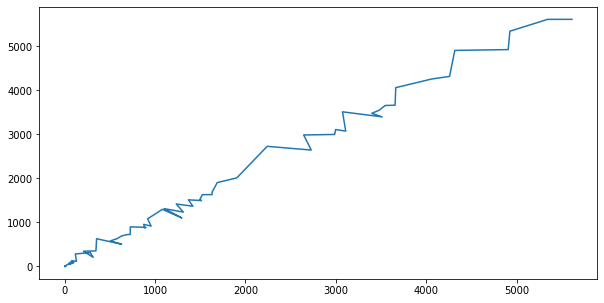

In [91]:
plt.plot(df_ind_con_1['TargetValue'],df_ind_con_1['lag1'])

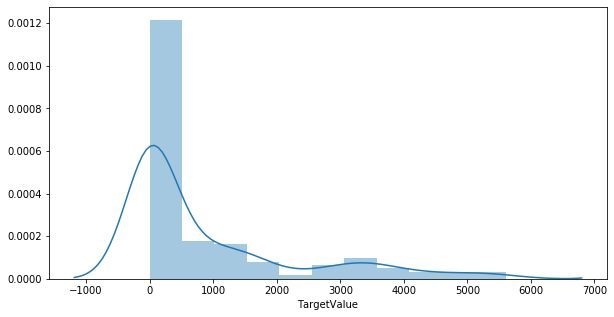

In [92]:
import seaborn as sns
sns.distplot(df_ind_con_1['TargetValue'])

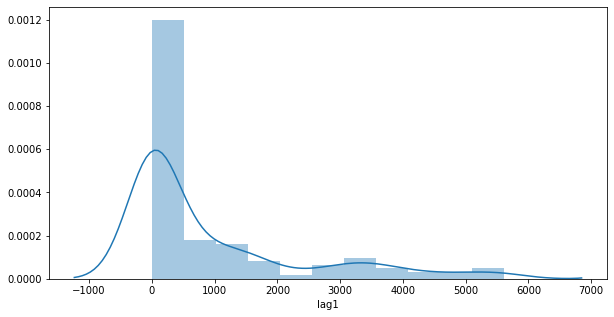

In [93]:
sns.distplot(df_ind_con_1['lag1'])

In [94]:
df_ind_con_1['log_TargetValue']=df_ind_con_1['TargetValue']
df_ind_con_1['log_lag1']=df_ind_con_1['lag1']

In [95]:
df_ind_con_1['log_TargetValue'].replace(0,1,inplace=True)
df_ind_con_1['log_lag1'].replace(0,1,inplace=True)

In [96]:
df_ind_con_1['log_TargetValue'] = np.log(df_ind_con_1['log_TargetValue'])
df_ind_con_1['log_lag1'] = np.log(df_ind_con_1['log_lag1'])

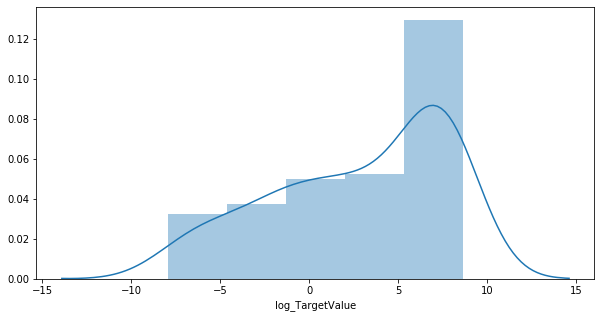

In [97]:
sns.distplot(df_ind_con_1['log_TargetValue'])

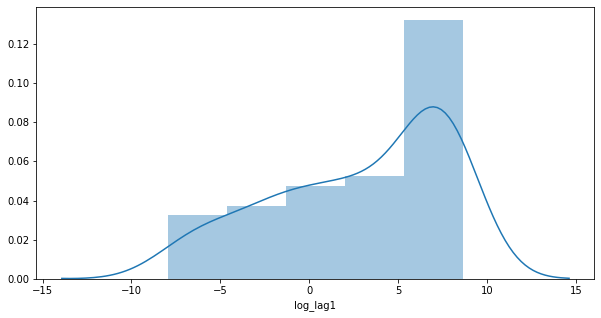

In [98]:
sns.distplot(df_ind_con_1['log_lag1'])

In [99]:
train_data = df_ind_con_1[:train_end]
test_data =df_ind_con_1[train_end+timedelta(days=1):]

In [100]:
X_train=np.array(train_data['log_lag1'])
y_train=np.array(train_data['log_TargetValue'])

X_test=np.array(test_data['log_lag1']) 
y_test=np.array(test_data['log_TargetValue'])

In [101]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [102]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [103]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
LR.coef_

array([[0.9731007]])

In [105]:
LR.intercept_

array([-0.0323696])

In [110]:
predictions=LR.predict(X_test)

In [113]:
LR.score(X_test,y_test)

0.4580723217812144

In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.04503622017466463

In [114]:
predictions=pd.DataFrame(predictions)

In [119]:
import math
predictions.rename(columns={0:'log_TargetValue'},inplace=True)

predictions.head()

log_TargetValue
0         7.369526
1         7.474552
2         7.666109
3         7.635632
4         7.754155

In [123]:
predictions['log_TargetValue'] = predictions['log_TargetValue'].astype('float64')
predictions.dtypes

log_TargetValue    float64
dtype: object

In [125]:
predictions['TargetValue'] = np.exp(predictions['log_TargetValue'])

In [126]:
predictions.head()

log_TargetValue  TargetValue
0         7.369526  1586.882076
1         7.474552  1762.612734
2         7.666109  2134.759017
3         7.635632  2070.678676
4         7.754155  2331.238048

In [131]:
test_data.index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [133]:
predictions.index =test_data.index

In [134]:
predictions.head()

log_TargetValue  TargetValue
Date                                    
2020-05-01         7.369526  1586.882076
2020-05-02         7.474552  1762.612734
2020-05-03         7.666109  2134.759017
2020-05-04         7.635632  2070.678676
2020-05-05         7.754155  2331.238048

In [135]:
residuals = test_data['TargetValue'] - predictions['TargetValue']

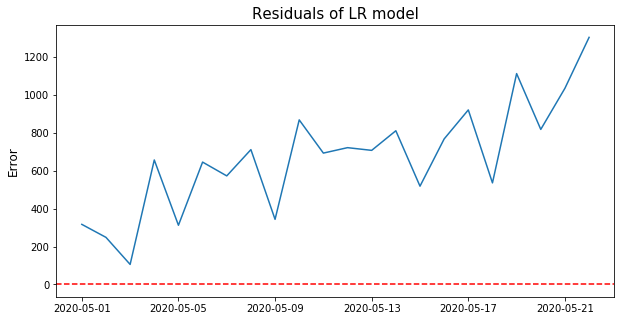

In [136]:
plt.plot(residuals)
plt.title('Residuals of LR model', fontsize=15)
plt.ylabel('Error', fontsize=12)
plt.axhline(0, color='r', linestyle='--')

Text(0, 0.5, 'Confirmed Cases')

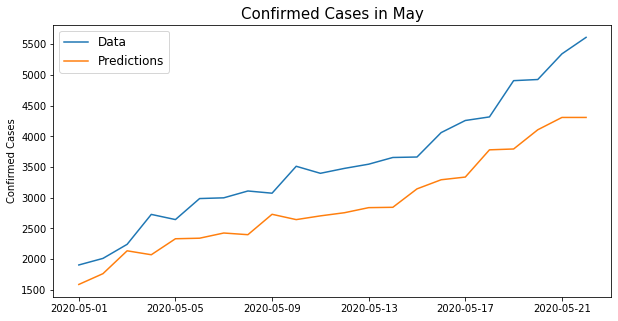

In [137]:
plt.plot(test_data['TargetValue'])
plt.plot(predictions['TargetValue'])

plt.legend(('Data', 'Predictions'), fontsize=12)
plt.title('Confirmed Cases in May', fontsize=15)
plt.ylabel('Confirmed Cases')

In [149]:
import pickle
pickle.dump(LR, open('f:/','wb'))

PermissionError: [Errno 13] Permission denied: 'f:/'

NameError: name 'pwd' is not defined

In [158]:
df_ind_fal.head()

Id County Province_State Country_Region  Population  Weight  \
34849  40322    NaN            NaN          India  1295210000  0.4766   
34851  40324    NaN            NaN          India  1295210000  0.4766   
34853  40326    NaN            NaN          India  1295210000  0.4766   
34855  40328    NaN            NaN          India  1295210000  0.4766   
34857  40330    NaN            NaN          India  1295210000  0.4766   

             Date      Target  TargetValue  
34849  2020-01-23  Fatalities          0.0  
34851  2020-01-24  Fatalities          0.0  
34853  2020-01-25  Fatalities          0.0  
34855  2020-01-26  Fatalities          0.0  
34857  2020-01-27  Fatalities          0.0

In [159]:
df_ind_fal.describe()

Id    Population        Weight  TargetValue
count    121.000000  1.210000e+02  1.210000e+02   121.000000
mean   40442.000000  1.295210e+09  4.766004e-01    30.793388
std       70.147464  0.000000e+00  6.689036e-16    46.039461
min    40322.000000  1.295210e+09  4.766004e-01    -1.000000
25%    40382.000000  1.295210e+09  4.766004e-01     0.000000
50%    40442.000000  1.295210e+09  4.766004e-01     1.000000
75%    40502.000000  1.295210e+09  4.766004e-01    45.000000
max    40562.000000  1.295210e+09  4.766004e-01   175.000000

In [160]:
df_ind_fal[df_ind_fal['TargetValue']<0]

Id County Province_State Country_Region  Population  Weight  \
34965  40438    NaN            NaN          India  1295210000  0.4766   

             Date      Target  TargetValue  
34965  2020-03-21  Fatalities         -1.0

In [161]:
df_ind_fal['TargetValue'].sum()

3726.0

In [162]:
df_ind_fal.dtypes

Id                  int64
County             object
Province_State     object
Country_Region     object
Population          int64
Weight            float64
Date               object
Target             object
TargetValue       float64
dtype: object

In [163]:
df_ind_fal['Date'] = pd.to_datetime(df_ind_fal['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
Moving_avg(df_ind_fal)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [165]:
df_ind_fal_1 = df_ind_fal[['Date','TargetValue']]
df_ind_fal_1 = df_ind_fal_1.set_index('Date')
df_ind_fal_1.head()

TargetValue
Date                   
2020-01-23          0.0
2020-01-24          0.0
2020-01-25          0.0
2020-01-26          0.0
2020-01-27          0.0

In [166]:
df_ind_fal_1.describe()

TargetValue
count   121.000000
mean     27.425727
std      41.252519
min       0.000000
25%       0.000000
50%       1.209545
75%      39.023113
max     136.371781

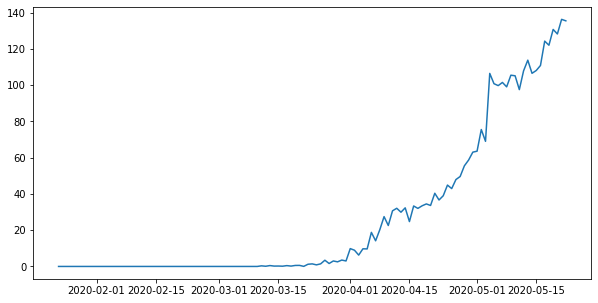

In [167]:
plt.plot(df_ind_fal_1['TargetValue'])

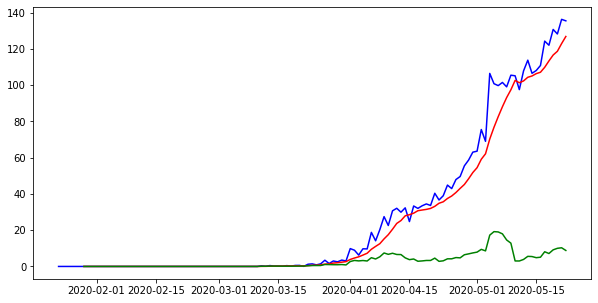

In [168]:
rolmean = df_ind_fal_1.rolling(window=7).mean()
rolstd = df_ind_fal_1.rolling(window=7).std()
ori =plt.plot(df_ind_fal_1, color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [169]:
Dicky_Fuller(df_ind_fal_1['TargetValue'])

ADF Statistic :3.7113523193650497
p_value :1.0


First Difference

In [189]:
df_ind_fal_1['Fal First Difference'] = df_ind_fal_1['TargetValue'] - df_ind_fal_1['TargetValue'].shift(1)
df_ind_fal_1.head()

TargetValue  Fal First Difference  Fal Second Difference  \
Date                                                                   
2020-01-23          0.0                   NaN                    NaN   
2020-01-24          0.0                   0.0                    NaN   
2020-01-25          0.0                   0.0                    0.0   
2020-01-26          0.0                   0.0                    0.0   
2020-01-27          0.0                   0.0                    0.0   

            fal first  
Date                   
2020-01-23        NaN  
2020-01-24        0.0  
2020-01-25        0.0  
2020-01-26        0.0  
2020-01-27        0.0

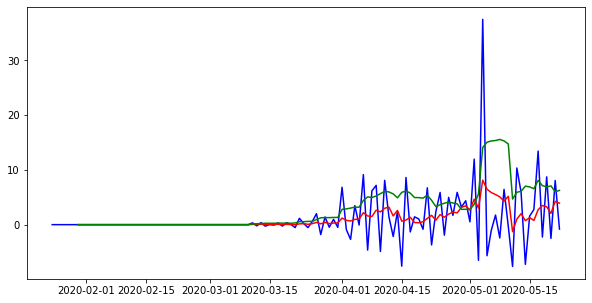

In [190]:
rolmean = df_ind_fal_1['Fal First Difference'].rolling(window=7).mean()
rolstd = df_ind_fal_1['Fal First Difference'].rolling(window=7).std()
ori =plt.plot(df_ind_fal_1['Fal First Difference'], color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [191]:
Dicky_Fuller(df_ind_fal_1['Fal First Difference'].dropna())

ADF Statistic :-2.3450272408910124
p_value :0.15785657700686473


In [187]:
df_ind_fal_1['fal first'] = df_ind_fal_1['TargetValue'].diff(periods=1)
df_ind_fal_1.head()

TargetValue  Fal First Difference  Fal Second Difference  \
Date                                                                   
2020-01-23          0.0                   NaN                    NaN   
2020-01-24          0.0                   0.0                    NaN   
2020-01-25          0.0                   0.0                    0.0   
2020-01-26          0.0                   0.0                    0.0   
2020-01-27          0.0                   0.0                    0.0   

            fal first  
Date                   
2020-01-23        NaN  
2020-01-24        0.0  
2020-01-25        0.0  
2020-01-26        0.0  
2020-01-27        0.0

In [192]:
df_ind_fal_1.tail()

TargetValue  Fal First Difference  Fal Second Difference  \
Date                                                                   
2020-05-18   122.089142             -2.264381            -138.788060   
2020-05-19   130.814222              8.725080             532.481164   
2020-05-20   128.301121             -2.513101            -572.435632   
2020-05-21   136.371781              8.070660             399.681844   
2020-05-22   135.557634             -0.814147            -149.251263   

            fal first  
Date                   
2020-05-18  -2.264381  
2020-05-19   8.725080  
2020-05-20  -2.513101  
2020-05-21   8.070660  
2020-05-22  -0.814147

Second Difference

In [193]:
df_ind_fal_1['Fal Second Difference'] = df_ind_fal_1['Fal First Difference'] - df_ind_fal_1['Fal First Difference'].shift(1)
df_ind_fal_1.head()

TargetValue  Fal First Difference  Fal Second Difference  \
Date                                                                   
2020-01-23          0.0                   NaN                    NaN   
2020-01-24          0.0                   0.0                    NaN   
2020-01-25          0.0                   0.0                    0.0   
2020-01-26          0.0                   0.0                    0.0   
2020-01-27          0.0                   0.0                    0.0   

            fal first  
Date                   
2020-01-23        NaN  
2020-01-24        0.0  
2020-01-25        0.0  
2020-01-26        0.0  
2020-01-27        0.0

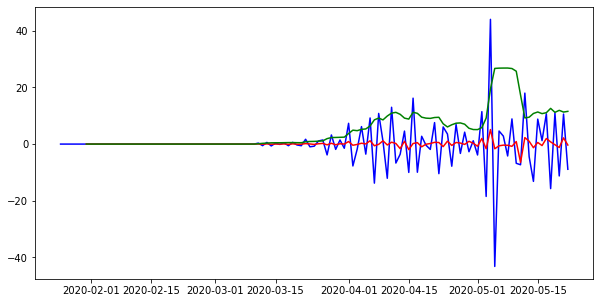

In [194]:
rolmean = df_ind_fal_1['Fal Second Difference'].rolling(window=7).mean()
rolstd = df_ind_fal_1['Fal Second Difference'].rolling(window=7).std()
ori =plt.plot(df_ind_fal_1['Fal Second Difference'], color='blue', label='Original')
mean =plt.plot(rolmean, color='red', label='Mean')
std =plt.plot(rolstd,color='green',label='Std')

In [195]:
Dicky_Fuller(df_ind_fal_1['Fal Second Difference'].dropna())

ADF Statistic :-5.176710750896851
p_value :9.807442732404368e-06


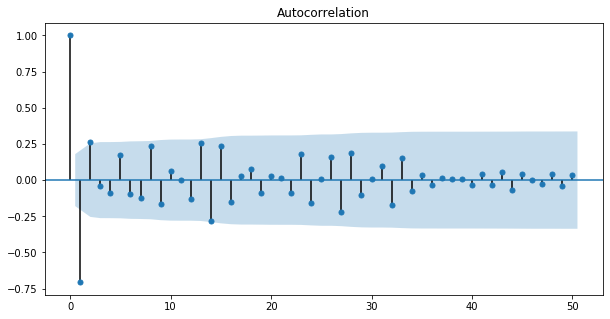

In [198]:
acf =plot_acf(df_ind_fal_1['Fal Second Difference'].dropna(),lags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



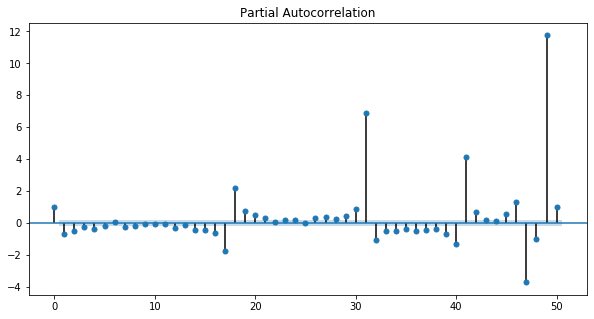

In [199]:
pacf =plot_pacf(df_ind_fal_1['Fal Second Difference'].dropna(), lags=50)

In [181]:
train_data = df_ind_fal_1[:train_end]
test_data =df_ind_fal_1[train_end+timedelta(days=1):]

In [183]:
train_data.tail()

TargetValue  Fal First Difference  Fal Second Difference
Date                                                                
2020-04-26    47.958862            -16.975089            -161.645144
2020-04-27    49.644596             27.231656              44.206744
2020-04-28    55.534486            107.418856              80.187200
2020-04-29    58.726361             -0.116496            -107.535352
2020-04-30    63.086949             56.767453              56.883949

In [184]:
ARIMA_model = ARIMA(train_data['TargetValue'],order=(1,2,0))
ARIMA_model_fal_fit=ARIMA_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [185]:
ARIMA_model_fal_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.TargetValue   No. Observations:                   97
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -244.027
Method:                       css-mle   S.D. of innovations              2.983
Date:                Mon, 20 Jul 2020   AIC                            494.053
Time:                        13:07:55   BIC                            501.778
Sample:                    01-25-2020   HQIC                           497.177
                         - 04-30-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0403      0.177      0.228      0.820      -0.307       0.387
ar.L1.D2.TargetValue    -0.7195      0.069    -10.469      0.000      -0.854      -0.585
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3899           +0.0000j            1.3899            0.5000
-----------------------------------------------------------------------------
"""

Doubts
1.pickle saving error
2.